In [4]:
pip install playsound


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [11]:
from playsound import playsound

In [27]:
playsound('FM.wav')

In [28]:
playsound('ST.wav')

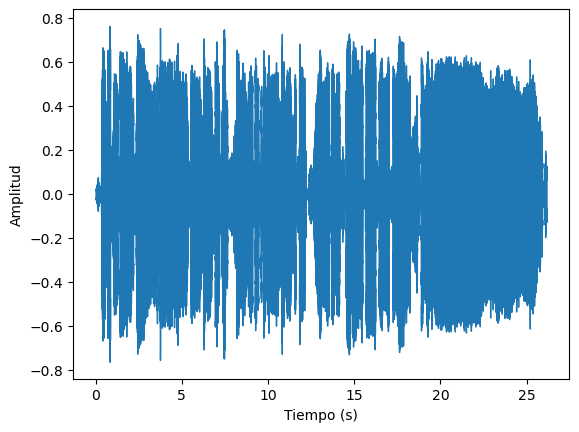

In [14]:
import matplotlib.pyplot as plt
import librosa
import librosa.display

# Carga el archivo de audio para BTR
y, zr = librosa.load('FM.wav', sr=None)

plt.figure()
librosa.display.waveshow(y, sr=zr)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

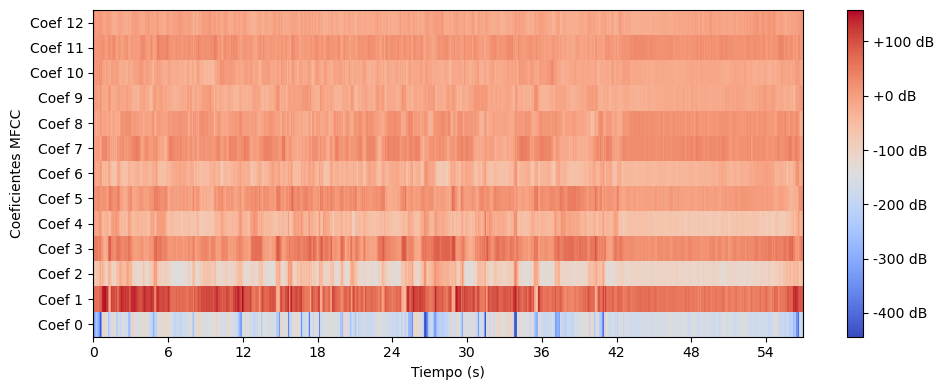

In [16]:
# Calcular MFCC
import numpy as np

n_mfcc=13
mfccs1 = librosa.feature.mfcc(y=y, sr=zr, n_mfcc=n_mfcc)

# Visualizar MFCC
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs1, x_axis='time')
plt.yticks(np.arange(n_mfcc), [f'Coef {i}' for i in range(n_mfcc)])
plt.xlabel('Tiempo (s)')
plt.ylabel('Coeficientes MFCC')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

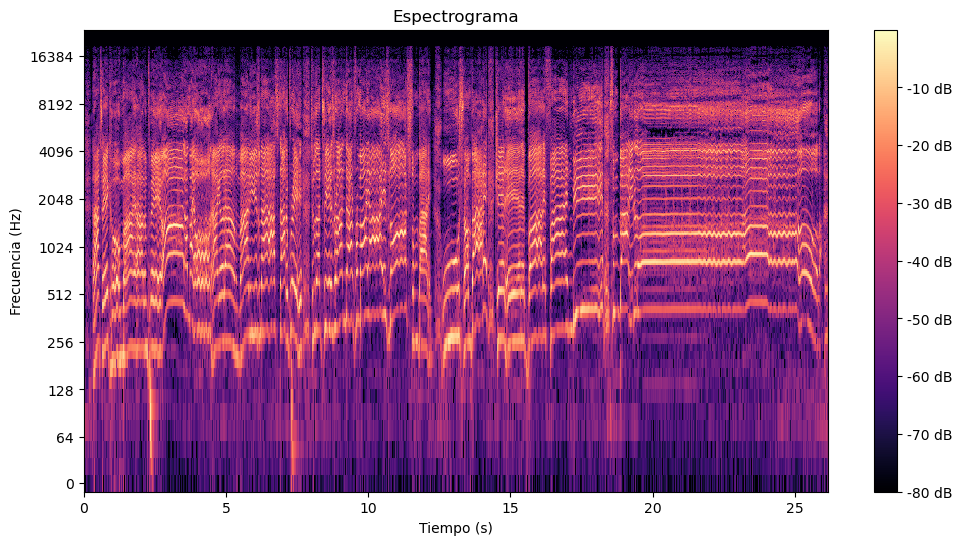

In [17]:
# Calcular el espectrograma de la señal de audio
S = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)

# Visualizar el espectrograma
plt.figure(figsize=(12, 6))
librosa.display.specshow(S_db, sr=zr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma')
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.show()

In [18]:
# Obtener las frecuencias y los tiempos del espectrograma
frequencies1 = librosa.fft_frequencies(sr=zr)
len(frequencies1)

1025

In [19]:
# Sumar las amplitudes a lo largo del tiempo para cada frecuencia
sum_amplitudes1 = np.sum(S_db, axis=1)

# Seleccionar las 10 frecuencias más representativas
top_n1 = 10
top_indices1 = np.argsort(sum_amplitudes1)[-top_n1:][::-1]
top_frequencies1 = frequencies1[top_indices1]
top_amplitudes1 = sum_amplitudes1[top_indices1]
top_amplitudes1

array([-80542.77, -80728.06, -81163.87, -81296.15, -81586.48, -81735.19,
       -82671.83, -83410.15, -84102.76, -84104.67], dtype=float32)

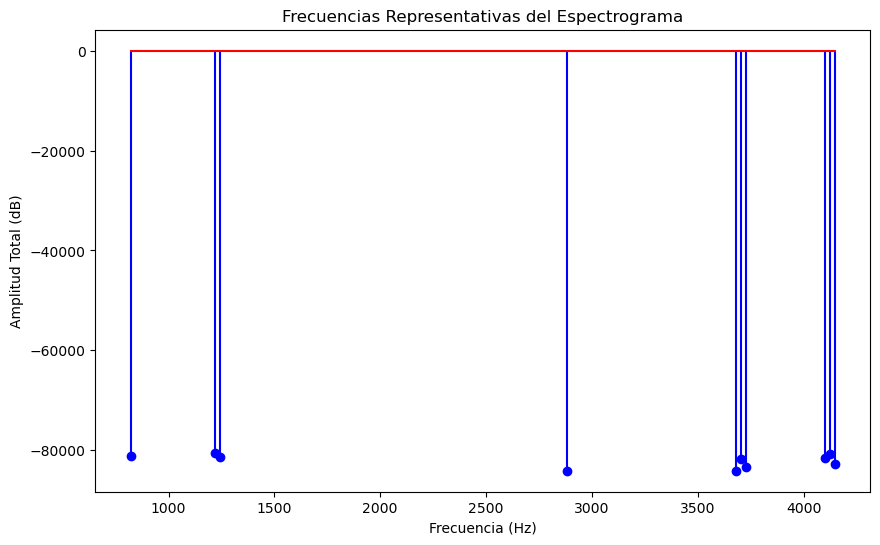

In [20]:
# Visualizar las frecuencias representativas como líneas
plt.figure(figsize=(10, 6))
plt.stem(top_frequencies1, top_amplitudes1, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud Total (dB)')
plt.title('Frecuencias Representativas del Espectrograma')
plt.show()

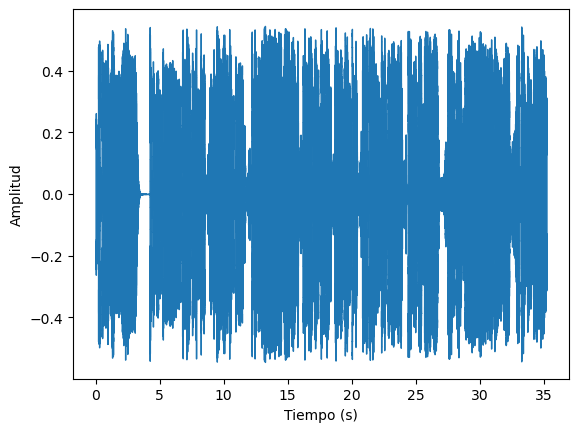

In [21]:
# Carga el archivo de audio para The Beatles
x, sr = librosa.load('ST.wav', sr=None)

plt.figure()
librosa.display.waveshow(x, sr=sr)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

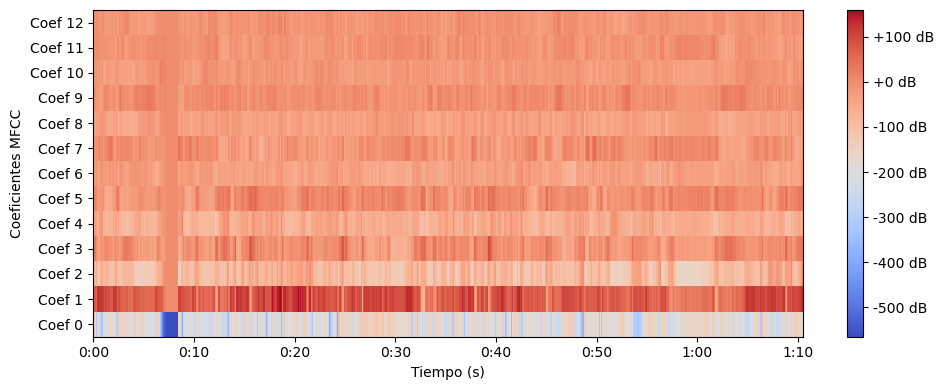

In [22]:
# Calcular MFCC
mfccs2 = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=13)

# Visualizar MFCC
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs2, x_axis='time')
plt.yticks(np.arange(n_mfcc), [f'Coef {i}' for i in range(n_mfcc)])
plt.xlabel('Tiempo (s)')
plt.ylabel('Coeficientes MFCC')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

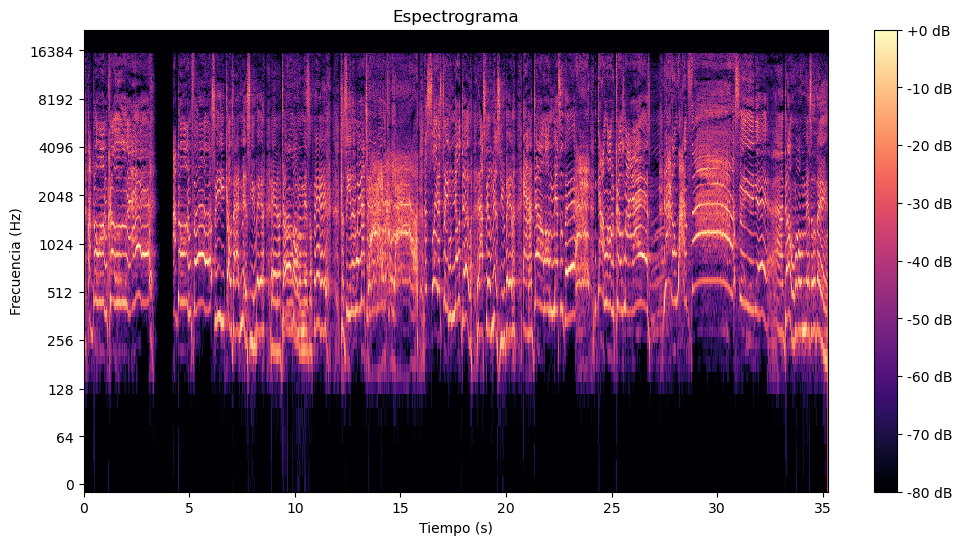

In [23]:
# Calcular el espectrograma de la señal de audio
Z = librosa.stft(x)
Z_db = librosa.amplitude_to_db(np.abs(Z), ref=np.max)

# Visualizar el espectrograma
plt.figure(figsize=(12, 6))
librosa.display.specshow(Z_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma')
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.show()

In [24]:
# Obtener las frecuencias y los tiempos del espectrograma
frequencies2 = librosa.fft_frequencies(sr=sr)
len(frequencies2)

1025

In [25]:
# Sumar las amplitudes a lo largo del tiempo para cada frecuencia
sum_amplitudes2 = np.sum(Z_db, axis=1)

# Seleccionar las 10 frecuencias más representativas
top_n2 = 10
top_indices2 = np.argsort(sum_amplitudes2)[-top_n2:][::-1]
top_frequencies2 = frequencies2[top_indices2]
top_amplitudes2 = sum_amplitudes2[top_indices2]
top_amplitudes2

array([-108275.12 , -111110.42 , -111784.586, -112704.86 , -113510.695,
       -113527.31 , -113557.484, -115032.2  , -115157.19 , -115390.38 ],
      dtype=float32)

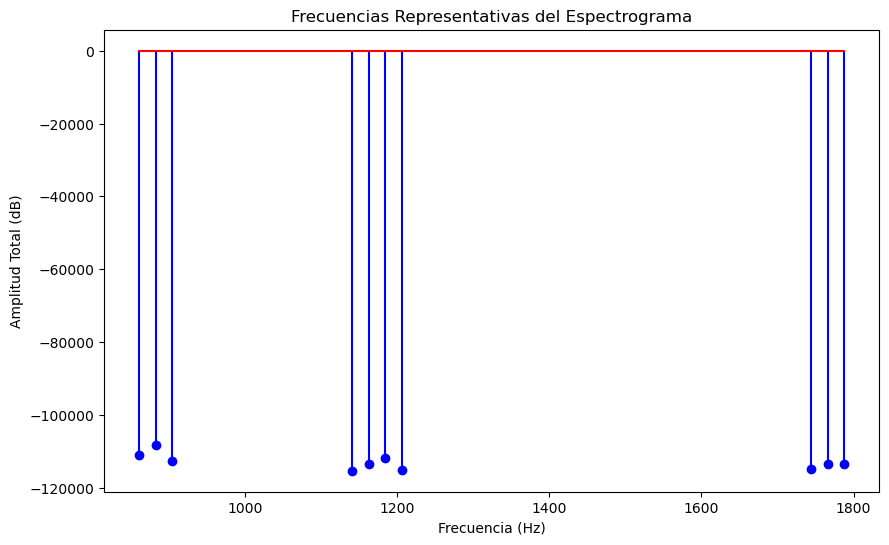

In [26]:
# Visualizar las frecuencias representativas como líneas
plt.figure(figsize=(10, 6))
plt.stem(top_frequencies2, top_amplitudes2, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud Total (dB)')
plt.title('Frecuencias Representativas del Espectrograma')
plt.show()